In [1]:
from autocluster import AutoCluster
from evaluators import get_evaluator
from sklearn import datasets
from collections import Counter
from utils.metafeatures import MetafeatureMapper
from sklearn.metrics.cluster import v_measure_score
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
df = pd.DataFrame(datasets.load_digits()['data'])
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [ ]:
cluster = AutoCluster()
fit_params = {
    "df": df, 
    "cluster_alg_ls": [
        'KMeans', 'GaussianMixture', 'Birch', 
        'MiniBatchKMeans', 'AgglomerativeClustering', 'OPTICS', 
        'SpectralClustering', 'DBSCAN', 'AffinityPropagation', 'MeanShift'
    ], 
    "dim_reduction_alg_ls": [
        'TSNE', 'PCA', 'IncrementalPCA', 
        'KernelPCA', 'FastICA', 'TruncatedSVD'
    ],
    "n_evaluations": 100,
    "run_obj": 'quality',
    "seed": 27,
    "cutoff_time": 100,
    "preprocess_dict": {
        "numeric_cols": list(range(64)),
        "categorical_cols": [],
        "ordinal_cols": [],
        "y_col": []
    },
    "evaluator": get_evaluator(evaluator_ls = ['silhouetteScore'], 
                               weights = [], clustering_num = None, 
                               min_proportion = .01),
    "n_folds": 5,
    "warmstart": False,
    "general_metafeatures": MetafeatureMapper.getGeneralMetafeatures(),
    "numeric_metafeatures": MetafeatureMapper.getNumericMetafeatures(),
    "categorical_metafeatures": [],
}
result_dict = cluster.fit(**fit_params)

1396/1797 datapoints remaining after outlier removal
Configuration space object:
  Hyperparameters:
    affinity___AffinityPropagation, Type: Categorical, Choices: {euclidean}, Default: euclidean
    affinity___AgglomerativeClustering, Type: Categorical, Choices: {euclidean, cityblock, l2, l1, manhattan, cosine}, Default: euclidean
    affinity___SpectralClustering, Type: Categorical, Choices: {nearest_neighbors, poly, sigmoid, laplacian, rbf}, Default: rbf
    algorithm___FastICA, Type: Categorical, Choices: {parallel, deflation}, Default: parallel
    algorithm___TruncatedSVD, Type: Categorical, Choices: {arpack, randomized}, Default: randomized
    assign_labels___SpectralClustering, Type: Categorical, Choices: {kmeans, discretize}, Default: kmeans
    bandwidth___MeanShift, Type: UniformFloat, Range: [0.1, 50.0], Default: 25.05
    batch_size___IncrementalPCA, Type: UniformInteger, Range: [10, 1000], Default: 100
    batch_size___MiniBatchKMeans, Type: UniformInteger, Range: [10, 1

/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:35: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return np.count_nonzero(X == None) + np.count_nonzero(X == '')
/home/wywongbd/coding_workspace/autocluster/autocluster/utils/metafeatures.py:43: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return (np.count_nonzero(X == '') + np.count_nonzero(X == 0)) / X.size
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/numpy/lib/function_

Fitting configuration: 
{'early_exaggeration___TSNE': 12.0, 'clustering_choice': 'KMeans', 'n_clusters___KMeans': 5, 'perplexity___TSNE': 30.0, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2}
Score obtained by this configuration: 0.27005424797534944
Fitting configuration: 
{'cluster_method___OPTICS': 'xi', 'metric___OPTICS': 'minkowski', 'clustering_choice': 'OPTICS', 'n_components___KernelPCA': 7, 'kernel___KernelPCA': 'poly', 'dim_reduction_choice': 'KernelPCA', 'min_samples___OPTICS': 788}


Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 247, in evaluate_model
    y_pred = clustering_model.fit_predict(compressed_valid_data)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/base.py", line 447, in fit_predict
    self.fit(X)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/optics_.py", line 248, in fit
    max_eps=self.max_eps)
  File "/hom

Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'algorithm___TruncatedSVD': 'randomized', 'eigen_solver___SpectralClustering': 'arpack', 'affinity___SpectralClustering': 'laplacian', 'n_clusters___SpectralClustering': 7, 'dim_reduction_choice': 'TruncatedSVD', 'assign_labels___SpectralClustering': 'kmeans', 'n_components___TruncatedSVD': 2}
Score obtained by this configuration: 0.3160352487075943
Fitting configuration: 
{'early_exaggeration___TSNE': 16.340662721939843, 'clustering_choice': 'KMeans', 'n_clusters___KMeans': 1, 'perplexity___TSNE': 33.06253665921351, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2}
Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'cosine', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 6, 'n_clusters___Birch': 2, 'branching_factor___Birch': 794, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.39428990724907165
Fitting configuration: 
{'affinity___AffinityPropagation': 'euclidean', 'kernel___KernelPCA': 'rbf', 'clustering_choice': 'AffinityPropagation', 'damping___AffinityPropagation': 0.6909880427855755, 'n_components___KernelPCA': 5, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.35797789093871596
Fitting configuration: 
{'n_components___KernelPCA': 8, 'kernel___KernelPCA': 'poly', 'clustering_choice': 'KMeans', 'dim_reduction_choice': 'KernelPCA', 'n_clusters___KMeans': 22}
Score obtained by this configuration: 0.3474557442620568
Fitting configuration: 
{'affinity___AffinityPropagation': 'euclidean', 'kernel___KernelPCA': 'linear', 'clustering_choice': 'AffinityPropagation', 'damping___Affinity

Fitting configuration: 
{'kernel___KernelPCA': 'linear', 'clustering_choice': 'AgglomerativeClustering', 'affinity___AgglomerativeClustering': 'euclidean', 'linkage___AgglomerativeClustering': 'ward', 'n_components___KernelPCA': 6, 'n_clusters___AgglomerativeClustering': 12, 'dim_reduction_choice': 'KernelPCA'}
Score obtained by this configuration: 0.3619230625552663
Fitting configuration: 
{'kernel___KernelPCA': 'rbf', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 2, 'n_clusters___Birch': 2, 'branching_factor___Birch': 640, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (2). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)


Score obtained by this configuration: inf


Fitting configuration: 
{'kernel___KernelPCA': 'rbf', 'clustering_choice': 'Birch', 'n_components___KernelPCA': 5, 'n_clusters___Birch': 23, 'branching_factor___Birch': 386, 'dim_reduction_choice': 'KernelPCA'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (23). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (23). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (2) by Birch is less than (23). Decrease the threshold.
  % (len(centroids), self.n_clusters), ConvergenceWarning)
/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/sklearn/cluster/birch.py:627: ConvergenceWarning: Number of subclusters found (1) by Birch is less than (23). Decrease the threshold.
  % (len(centroids)

Score obtained by this configuration: inf


Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'cosine', 'affinity___SpectralClustering': 'nearest_neighbors', 'n_clusters___SpectralClustering': 17, 'n_components___KernelPCA': 9, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}
Score obtained by this configuration: 0.3850534098431827
Fitting configuration: 
{'clustering_choice': 'SpectralClustering', 'kernel___KernelPCA': 'linear', 'affinity___SpectralClustering': 'poly', 'n_clusters___SpectralClustering': 12, 'n_components___KernelPCA': 7, 'assign_labels___SpectralClustering': 'kmeans', 'dim_reduction_choice': 'KernelPCA', 'eigen_solver___SpectralClustering': 'arpack'}


/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/scipy/sparse/csgraph/_laplacian.py:120: RuntimeWarning: invalid value encountered in sqrt
  w = np.where(isolated_node_mask, 1, np.sqrt(w))
Process pynisher function call:
Traceback (most recent call last):
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 252, in _bootstrap
    self.run()
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/wywongbd/anaconda3/envs/spia2019/lib/python3.5/site-packages/pynisher/limit_function_call.py", line 93, in subprocess_func
    return_value = ((func(*args, **kwargs), 0))
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autocluster.py", line 234, in evaluate_model
    scaler, dim_reduction_model, clustering_model = fit_models(cfg, train_data)
  File "/home/wywongbd/coding_workspace/autocluster/autocluster/autoclu

Fitting configuration: 
{'early_exaggeration___TSNE': 5.92345241675155, 'batch_size___MiniBatchKMeans': 891, 'clustering_choice': 'MiniBatchKMeans', 'n_clusters___MiniBatchKMeans': 20, 'perplexity___TSNE': 234.05607785844984, 'dim_reduction_choice': 'TSNE', 'n_components___TSNE': 2}


In [7]:
result_dict['metafeatures'][0]

array([ 0.00000000e+00,  7.26892013e+00,  4.89710366e-01,  0.00000000e+00,
        1.43500000e+03, -1.42439248e+00,  4.37500000e-01, -3.00000000e+00,
       -5.97334325e-02,  4.14324365e-03, -7.97974857e-01,  4.89710366e-01,
       -6.15732321e-01,  9.70929296e+02, -9.43408206e-02,  3.37171491e+00,
        5.34933183e+00,  2.25939549e+00,  7.61653046e+01,  9.29187288e-01,
       -4.22923136e-01,  1.89249875e-01,  0.00000000e+00,  3.04450374e+01,
        4.24141015e+01, -1.95157596e+01,  2.98353252e-01, -1.12073604e-02,
       -1.43262334e+00,  6.47790625e-02, -2.48613034e-01, -1.00125132e+00,
        1.71685387e-01])

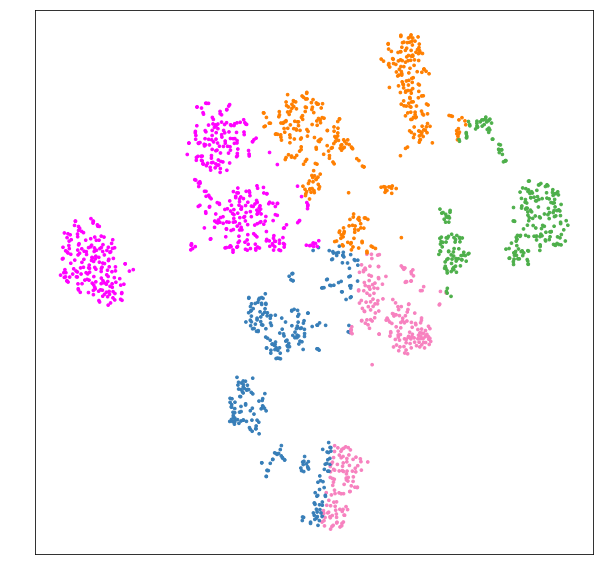

In [8]:
predictions = cluster.predict(df)

In [29]:
Counter(predictions)

Counter({0: 316, 1: 330, 2: 280, 3: 357, 4: 382, 5: 132})

In [30]:
v_measure_score(predictions, datasets.load_digits()['target'])

0.560357999138326